# Regression link :  https://github.com/TCodina/car-prices-app/blob/main/car-data/CarPrice_Assignment.csv

# REGRESSION TASK

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Provide the data description.

In [2]:
#load dataset
df = pd.read_csv("CarPrice_Assignment.csv")
print(df)
print(df.shape)
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

#finding target and numerical variable from dataset
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
target_variable = df.columns[-1]
numerical_features.remove(target_variable)

print("Target Variable:", target_variable)
print("Feature Variables:", list(df.columns.drop([target_variable])))
print("Numerical Features:", numerical_features)
print("\nMissing Values:\n", df.isnull().sum())

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

# Already there is no NaN values in dataset but I don’t want my pipeline to break if future datasets contain NaN values.

In [3]:
best_numerical_features = ['enginesize', 'curbweight', 'carwidth', 'carlength', 'citympg', 'wheelbase']
best_categorical_features = ['carbody', 'drivewheel', 'enginelocation', 'enginetype']

# Handle missing values ONLY if they exist
for col in best_numerical_features:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

for col in best_categorical_features:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Encode categorical features (one-hot)
df_encoded = pd.get_dummies(df[best_categorical_features], drop_first=True).astype(int)

# Final dataset = selected numerical + encoded categorical
final_df = pd.concat([df[best_numerical_features], df_encoded], axis=1)

final_df.info()
print("Final dataset shape:", final_df.shape)
print("Features ready for training ✅")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   enginesize           205 non-null    int64  
 1   curbweight           205 non-null    int64  
 2   carwidth             205 non-null    float64
 3   carlength            205 non-null    float64
 4   citympg              205 non-null    int64  
 5   wheelbase            205 non-null    float64
 6   carbody_hardtop      205 non-null    int64  
 7   carbody_hatchback    205 non-null    int64  
 8   carbody_sedan        205 non-null    int64  
 9   carbody_wagon        205 non-null    int64  
 10  drivewheel_fwd       205 non-null    int64  
 11  drivewheel_rwd       205 non-null    int64  
 12  enginelocation_rear  205 non-null    int64  
 13  enginetype_dohcv     205 non-null    int64  
 14  enginetype_l         205 non-null    int64  
 15  enginetype_ohc       205 non-null    int

# Implement the linear regression without using the built-in function available in sci-kit learn.

In [4]:
# X = final features (numerical + encoded categorical)
X = final_df.values
y = df[target_variable].values  # target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adding an intercept of 1s to the NumPy feature matrix
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b  = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Computing the regression coefficients using the Normal Equation (pseudo-inverse)
coefficients = np.linalg.pinv(X_train_b.T @ X_train_b) @ (X_train_b.T @ y_train)

# Extracting the intercept and slopes separately
intercept = coefficients[0]
slope = coefficients[1:]

# Predicting the target values for the test set using learned coefficients
y_pred_manual = X_test_b @ coefficients

# Printing model intercept and coefficients
print("Intercept:", intercept)
print("Coefficients:", slope)

# Model Evaluation metrics
mse = np.mean((y_test - y_pred_manual) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred_manual))
r2 = 1 - (np.sum((y_test - y_pred_manual) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print("\n--- Model Performance (Manual Linear Regression on Test Set) ---")
print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("R²  :", r2)

Intercept: -69426.63212031871
Coefficients: [ 6.39976285e+01  3.50571823e+00  1.02789261e+03 -1.31004941e+02
 -1.01725550e+02  2.76243522e+02 -4.06930386e+03 -4.46029696e+03
 -2.90328905e+03 -4.90494540e+03 -1.01809837e+03  3.11799701e+02
  1.78727662e+04  3.43176719e+03 -5.16540994e+03  2.30486028e+01
 -1.32652732e+03 -1.95127123e+02  4.08066415e+03]

--- Model Performance (Manual Linear Regression on Test Set) ---
MSE : 17659353.058571376
RMSE: 4202.303303971689
MAE : 2722.5208878723774
R²  : 0.7763053761159276


# Verify the output with the built-in function available in scikit-learn.

In [5]:
# Using LinearRegression for fitting linear model, best-fit line method estimates best fit line,the predict method applies learned model to test data.

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_sklearn = lr.predict(X_test)

# Evaluation
MSE  = mean_squared_error(y_test, y_pred_sklearn)
RMSE = np.sqrt(MSE)  # Use MSE here
MAE  = mean_absolute_error(y_test, y_pred_sklearn)
R2   = r2_score(y_test, y_pred_sklearn)


print("Linear Regression Results:")
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("MAE:", MAE)
print("R²:", R2)

Linear Regression Results:
Intercept: -69426.63230505053
Coefficients: [ 6.39976285e+01  3.50571822e+00  1.02789262e+03 -1.31004941e+02
 -1.01725550e+02  2.76243522e+02 -4.06930386e+03 -4.46029696e+03
 -2.90328905e+03 -4.90494540e+03 -1.01809838e+03  3.11799701e+02
  1.78727662e+04  3.43176718e+03 -5.16540994e+03  2.30486005e+01
 -1.32652732e+03 -1.95127125e+02  4.08066415e+03]
MSE: 17659353.06424187
RMSE: 4202.303304646378
MAE: 2722.520887940751
R²: 0.7763053760440983


# classification link :  https://www.kaggle.com/datasets/sumedh1507/bmw-car-sales-dataset

# CLASSIFICATION TASK

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Provide the data description.

In [7]:
df1 = pd.read_csv("BMW_Car_Sales_Classification.csv")
print(df1);df1.info()

print(df1.shape)
print("Rows:", df1.shape[0])
print("Columns:", df1.shape[1])

# Strip whitespace from column names
df1.columns = df1.columns.str.strip()

# Define features and target
target = df1.columns[-1]  # last column
features = df1.columns.drop(target)
numerical_features = features.tolist()

print("Target:", target)
print("Numerical Features:", numerical_features)
print("\nMissing Values:\n", df1.isnull().sum())

          Model  Year         Region   Color Fuel_Type Transmission  \
0      5 Series  2016           Asia     Red    Petrol       Manual   
1            i8  2013  North America     Red    Hybrid    Automatic   
2      5 Series  2022  North America    Blue    Petrol    Automatic   
3            X3  2024    Middle East    Blue    Petrol    Automatic   
4      7 Series  2020  South America   Black    Diesel       Manual   
...         ...   ...            ...     ...       ...          ...   
49995        i3  2014           Asia     Red    Hybrid       Manual   
49996        i3  2023    Middle East  Silver  Electric       Manual   
49997  5 Series  2010    Middle East     Red    Petrol    Automatic   
49998        i3  2020           Asia   White  Electric    Automatic   
49999        X1  2020  North America    Blue    Diesel       Manual   

       Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
0                3.5      151748      98740          8300         

# Implement Logistic regression and Naïve Bayes classification algorithm using scikit-learn.

In [8]:
# Encode categorical variables
categorical_cols = ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission']
df_encoded = pd.get_dummies(df1, columns=categorical_cols, drop_first=True)

# Encode target variable
le = LabelEncoder()
df_encoded['Sales_Classification'] = le.fit_transform(df_encoded['Sales_Classification'])  # High=1, Low=0

In [9]:
# Define features and target
X1 = df_encoded.drop('Sales_Classification', axis=1)
y1 = df_encoded['Sales_Classification']
print(X1)
print(y1)

       Year  Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume  \
0      2016            3.5      151748      98740          8300   
1      2013            1.6      121671      79219          3428   
2      2022            4.5       10991     113265          6994   
3      2024            1.7       27255      60971          4047   
4      2020            2.1      122131      49898          3080   
...     ...            ...         ...        ...           ...   
49995  2014            4.6      151030      42932          8182   
49996  2023            4.2      147396      48714          9816   
49997  2010            4.5      174939      46126          8280   
49998  2020            3.8        3379      58566          9486   
49999  2020            3.3      171003      77492          1764   

       Model_5 Series  Model_7 Series  Model_M3  Model_M5  Model_X1  ...  \
0                True           False     False     False     False  ...   
1               False           False     F

# Implement Logistic regression and Naïve Bayes classification algorithm using scikit-learn.
# Perform k-fold cross validation.

In [10]:
# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']
X1[numerical_cols] = scaler.fit_transform(X1[numerical_cols])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Implement Models
# Initialize models
lr_model = LogisticRegression(random_state=42, max_iter=1000)
nb_model = GaussianNB()

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Fit models
lr_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# Perform 5-fold cross-validation
lr_cv_scores = cross_val_score(lr_model, X1, y1, cv=kfold, scoring='accuracy')
nb_cv_scores = cross_val_score(nb_model, X1, y1, cv=kfold, scoring='accuracy')

print("Logistic Regression Accuracy (5-fold CV):", lr_cv_scores)
print("Naive Bayes Accuracy (5-fold CV):", nb_cv_scores)

print("\nLogistic Regression CV Accuracy: Mean = {:.4f}, Std = {:.4f}".format(
    lr_cv_scores.mean(), lr_cv_scores.std()))
print("Naïve Bayes CV Accuracy: Mean = {:.4f}, Std = {:.4f}".format(
    nb_cv_scores.mean(), nb_cv_scores.std()))

# Predict on test set
lr_predictions = lr_model.predict(X_test)
nb_predictions = nb_model.predict(X_test)

print(lr_predictions)
print(nb_predictions)

Logistic Regression Accuracy (5-fold CV): [0.9989 0.9985 0.9982 0.9983 0.9983]
Naive Bayes Accuracy (5-fold CV): [0.9952 0.9955 0.9941 0.9956 0.9949]

Logistic Regression CV Accuracy: Mean = 0.9984, Std = 0.0002
Naïve Bayes CV Accuracy: Mean = 0.9951, Std = 0.0005
[1 1 1 ... 1 0 1]
[1 1 1 ... 1 0 1]


# Evaluate the performance of the model using the standard objective metrics.

In [11]:
# Compute metrics
print("\nLogistic Regression Performance:")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, lr_predictions)))
print("Classification Report:")
print(classification_report(y_test, lr_predictions))
lr_roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print("ROC-AUC: {:.4f}".format(lr_roc_auc))

print("\nNaïve Bayes Performance:")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, nb_predictions)))
print("Classification Report:")
print(classification_report(y_test, nb_predictions))
nb_roc_auc = roc_auc_score(y_test, nb_model.predict_proba(X_test)[:, 1])
print("ROC-AUC: {:.4f}".format(nb_roc_auc))


Logistic Regression Performance:
Accuracy: 0.9989
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3032
           1       1.00      1.00      1.00      6968

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

ROC-AUC: 1.0000

Naïve Bayes Performance:
Accuracy: 0.9952
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3032
           1       1.00      1.00      1.00      6968

    accuracy                           1.00     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       1.00      1.00      1.00     10000

ROC-AUC: 0.9999


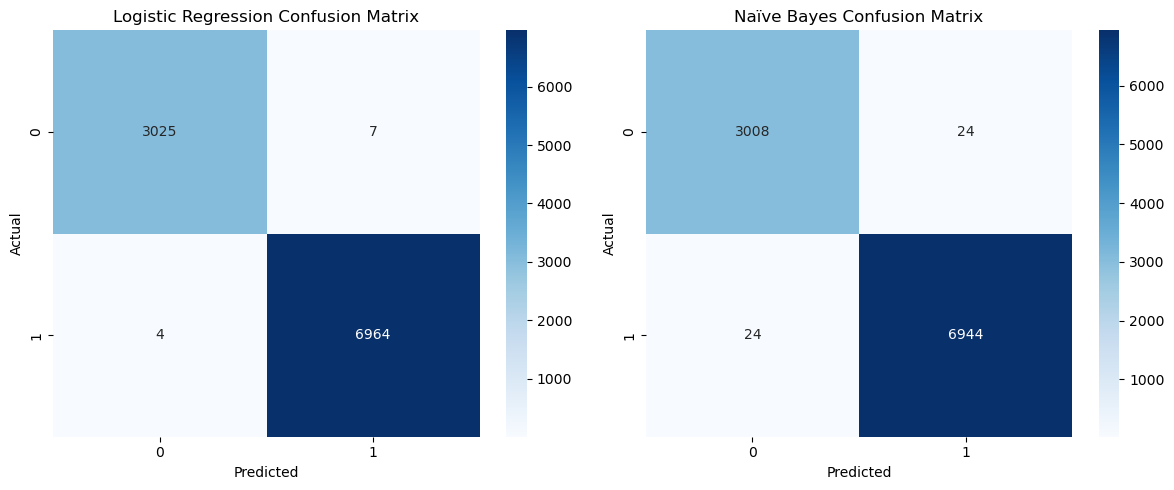

In [12]:
# Confusion matrices
lr_cm = confusion_matrix(y_test, lr_predictions)
nb_cm = confusion_matrix(y_test, nb_predictions)

# Plot confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Naïve Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Compare the performance of the implemented models.

In [13]:
print("\nModel Comparison:")
print("Logistic Regression: Accuracy = {:.4f}, ROC-AUC = {:.4f}, CV Mean = {:.4f}".format(
    accuracy_score(y_test, lr_predictions), lr_roc_auc, lr_cv_scores.mean()))
print("Naïve Bayes: Accuracy = {:.4f}, ROC-AUC = {:.4f}, CV Mean = {:.4f}".format(
    accuracy_score(y_test, nb_predictions), nb_roc_auc, nb_cv_scores.mean()))

# Discuss which model performs better based on metrics
if lr_roc_auc > nb_roc_auc:
    print("\nLogistic Regression outperforms Naïve Bayes based on ROC-AUC.")
else:
    print("Naïve Bayes outperforms Logistic Regression based on ROC-AUC.")


Model Comparison:
Logistic Regression: Accuracy = 0.9989, ROC-AUC = 1.0000, CV Mean = 0.9984
Naïve Bayes: Accuracy = 0.9952, ROC-AUC = 0.9999, CV Mean = 0.9951

Logistic Regression outperforms Naïve Bayes based on ROC-AUC.
